<h2>CLUSTERING PROCESS: OVERVIEW</h2> 
    <br>
    1. Inspecting data, filtering and cleaning <br>
    2. Converting to categorical variables <br>
    3. Creating dummy variables <br>
    4. Building the model with using K-Modes <br>
    5. Retrieving 10 clusters from the data <br>

In [9]:
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd
import plotly.graph_objects as go
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns
from IPython.core.display import HTML
import plotly.offline
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from kmodes.kmodes import KModes
from matplotlib.pyplot import xticks

In [10]:
dataset = pd.read_csv('../../../../stefan.nedelkovski/Treatment Episode Data Set: Discharges (TEDS-D)/tedsd_data_2017.csv')

<h1>INSPECTING DATA, FILTERING AND CLEANING</h1>

<h3>INSPECTING DATA</h3>

In [11]:
dataset.shape

(1661207, 76)

In [12]:
dataset

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2017,20171488889,2,-9,3,1,7,-9,36,6,...,0,0,0,0,0,0,9,4,-9,1
1,2017,20171398230,2,-9,3,4,7,-9,37,1,...,0,0,0,0,0,1,9,4,0,3
2,2017,20171376355,2,-9,3,4,7,-9,36,3,...,0,0,0,0,0,0,9,4,-9,2
3,2017,20171340949,2,-9,5,1,7,2,33,7,...,0,0,0,0,0,0,9,4,-9,1
4,2017,20171412960,2,-9,3,4,7,3,32,7,...,0,0,0,0,0,0,9,4,-9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661202,2017,20171600998,56,-9,3,1,6,1,35,7,...,0,0,0,0,0,0,8,4,-9,1
1661203,2017,20171638906,56,-9,4,1,7,-9,34,1,...,0,0,0,0,0,0,8,4,-9,1
1661204,2017,20171495681,56,-9,3,1,7,3,1,7,...,0,0,0,0,0,0,8,4,-9,3
1661205,2017,20171350310,56,-9,3,1,7,3,35,7,...,0,0,0,0,0,0,8,4,-9,2


<h3>FILTERING AND CLEANING THE DATA</h3>

In [7]:
def filtering_data(dataset):
    dataset = dataset[dataset.columns.drop(list(dataset.filter(regex="_D")))]
    dataset = dataset[dataset['NOPRIOR']==0]
    return dataset

In [14]:
def replacing_negative_with_nan(dataset):
    dataset = dataset.replace(-9, np.nan)
    return dataset

In [13]:
#not relevant columns for the clustering, therefore dropped
dataset = filtering_data(dataset)
dataset = dataset.drop(columns=['CBSA2010', 'DISYR', 'CASEID', 'STFIPS', 'REASON', 'FREQ_ATND_SELF_HELP', 'PRIMPAY', 'HLTHINS', 'IDU', 'FRSTUSE2', 'FRSTUSE3', 'ROUTE2', 'ROUTE3', 'SUB2', 'SUB3', 'VET', 'PREG', 'DETNLF', 'FREQ2', 'FREQ3', 'DETCRIM'])
dataset

,EDUC,MARSTAT,SERVICES,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,PSYPROB,...,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,ALCDRUG
3,5,1,7,33,7,0,0,1,2,2,...,0,0,0,0,0,0,0,9,4,1
5,3,1,7,36,7,0,0,1,2,2,...,0,0,0,0,0,0,0,9,4,3
6,3,2,7,36,1,0,0,2,2,1,...,0,0,0,0,0,0,0,9,4,1
7,2,2,7,33,1,0,1,3,2,2,...,0,0,0,0,0,0,1,9,4,3
8,2,2,7,33,1,0,0,3,2,1,...,0,0,0,0,0,0,0,9,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661202,3,1,6,35,7,0,0,3,2,2,...,0,0,0,0,0,0,0,8,4,1
1661203,4,1,7,34,1,0,0,1,2,2,...,0,0,0,0,0,0,0,8,4,1
1661204,3,1,7,1,7,0,0,1,2,2,...,0,0,0,0,0,0,0,8,4,3
1661205,3,1,7,35,7,0,2,4,2,2,...,0,0,0,0,0,0,0,8,4,2


In [15]:
dataset = replacing_negative_with_nan(dataset)

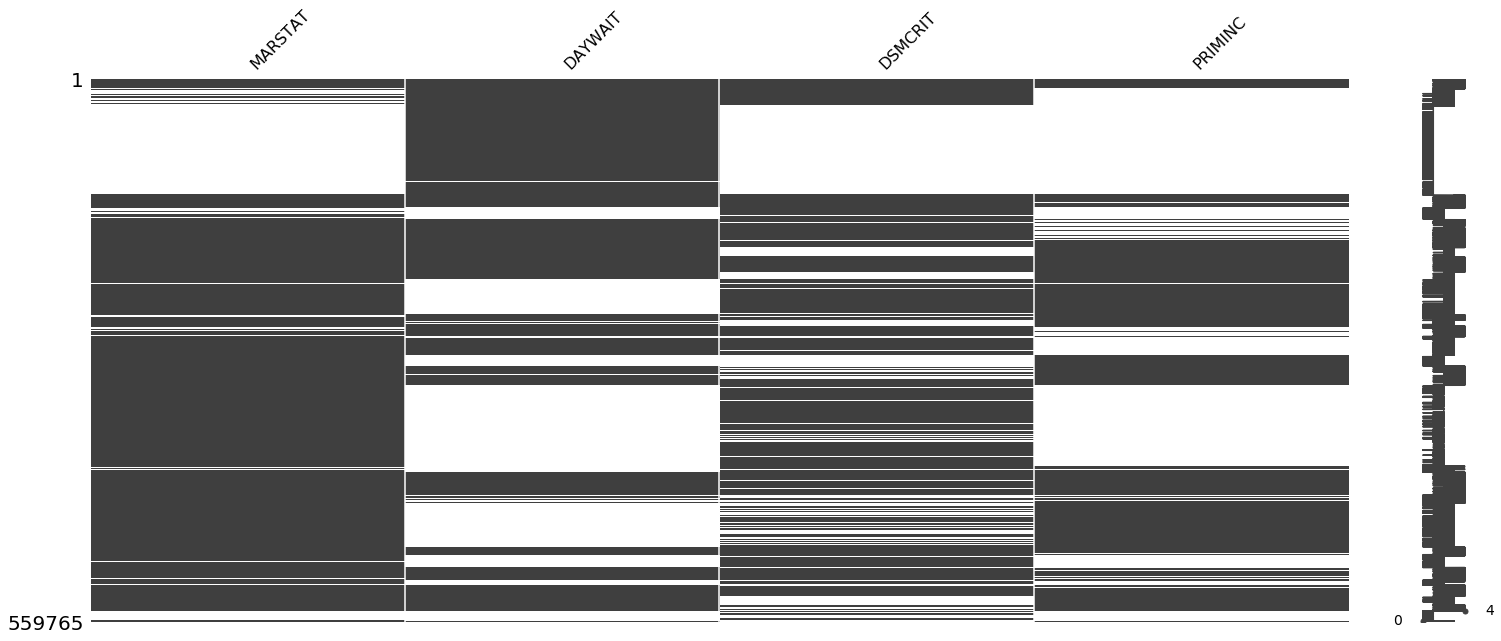

In [16]:
filtered = msno.nullity_filter(dataset, filter='bottom', n=43, p=0.9) #filtering the columns that are at most 90% full
msno.matrix(filtered)

In [17]:
#based on the filtering, dropping these 4 columns, now left with data that is at least 90% full
dataset = dataset.drop(columns=['MARSTAT', 'DAYWAIT', 'DSMCRIT', 'PRIMINC'])
dataset

,EDUC,SERVICES,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,PSYPROB,GENDER,...,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,ALCDRUG
3,5.0,7,33,7.0,0,0.0,1.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,9,4,1
5,3.0,7,36,7.0,0,0.0,1.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,9,4,3
6,3.0,7,36,1.0,0,0.0,2.0,2.0,1.0,1.0,...,0,0,0,0,0,0,0,9,4,1
7,2.0,7,33,1.0,0,1.0,3.0,2.0,2.0,2.0,...,0,0,0,0,0,0,1,9,4,3
8,2.0,7,33,1.0,0,0.0,3.0,2.0,1.0,2.0,...,0,0,0,0,0,0,0,9,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661202,3.0,6,35,7.0,0,0.0,3.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,8,4,1
1661203,4.0,7,34,1.0,0,0.0,1.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,8,4,1
1661204,3.0,7,1,7.0,0,0.0,1.0,2.0,2.0,2.0,...,0,0,0,0,0,0,0,8,4,3
1661205,3.0,7,35,7.0,0,2.0,4.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,8,4,2


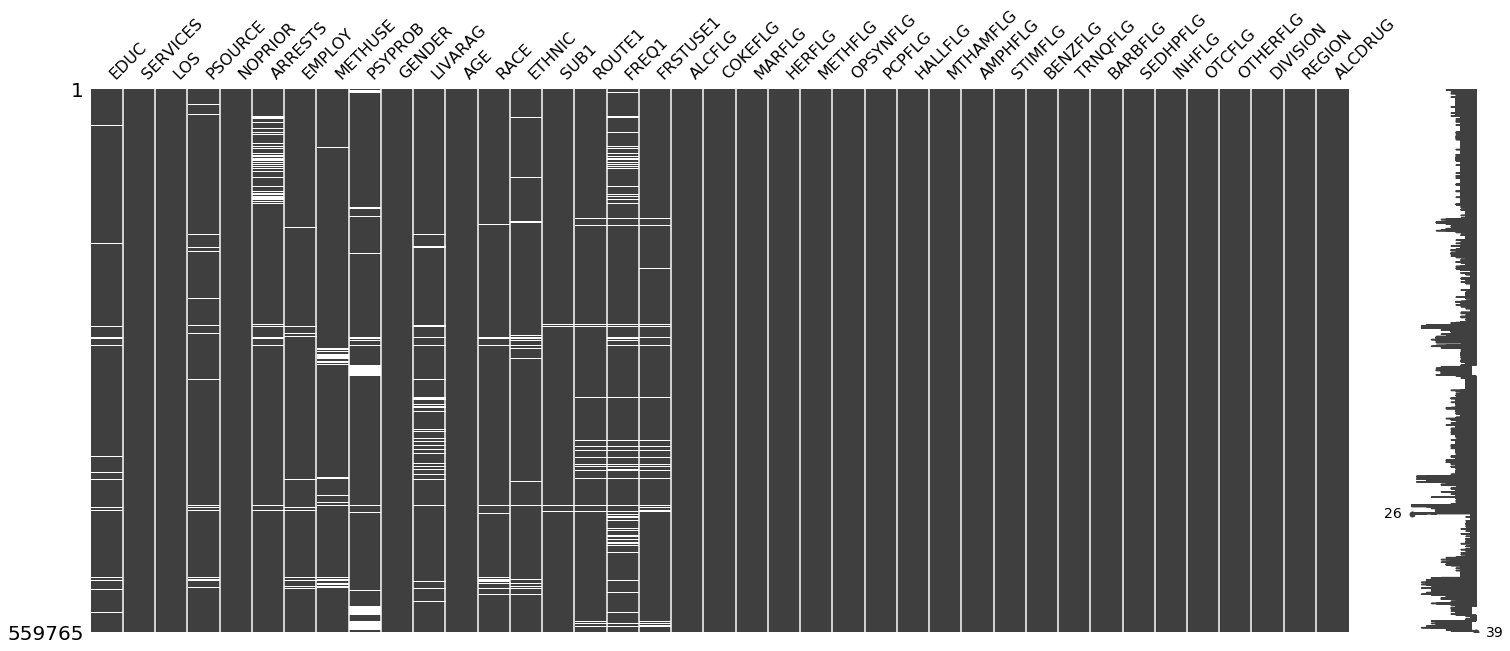

In [18]:
msno.matrix(dataset)

In [19]:
dataset = dataset.dropna()
dataset

,EDUC,SERVICES,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,PSYPROB,GENDER,...,BENZFLG,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,ALCDRUG
3,5.0,7,33,7.0,0,0.0,1.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,9,4,1
5,3.0,7,36,7.0,0,0.0,1.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,9,4,3
7,2.0,7,33,1.0,0,1.0,3.0,2.0,2.0,2.0,...,0,0,0,0,0,0,1,9,4,3
8,2.0,7,33,1.0,0,0.0,3.0,2.0,1.0,2.0,...,0,0,0,0,0,0,0,9,4,1
12,3.0,6,37,6.0,0,0.0,2.0,2.0,1.0,2.0,...,0,0,0,0,0,0,0,9,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661045,3.0,7,33,1.0,0,0.0,1.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,8,4,3
1661053,5.0,5,33,1.0,0,0.0,1.0,2.0,1.0,1.0,...,0,0,0,0,0,0,0,8,4,1
1661116,3.0,6,4,1.0,0,0.0,3.0,2.0,2.0,1.0,...,0,1,0,0,0,0,0,8,4,2
1661194,4.0,7,34,6.0,0,0.0,1.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,8,4,1


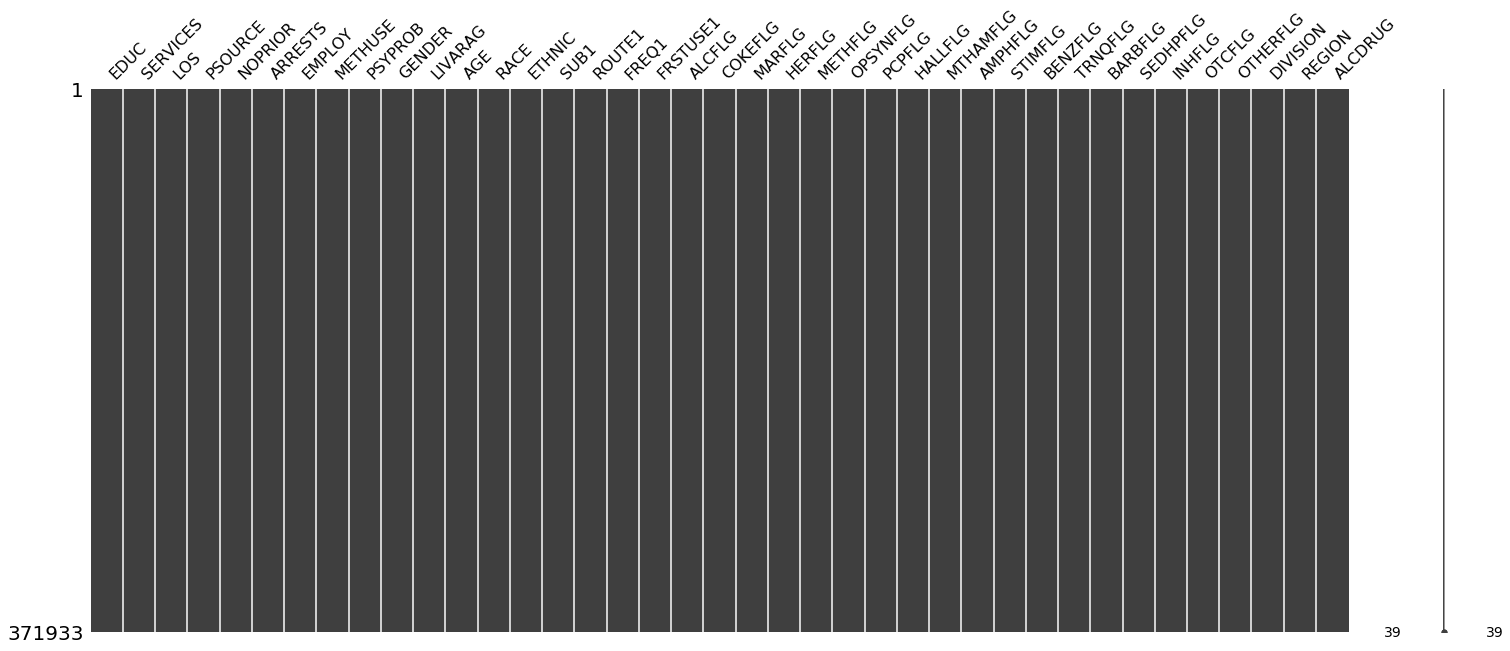

In [20]:
msno.matrix(dataset)

<h3>CONVERTING TO CATEGORICAL VARIABLES</h3>

In [21]:
dataset.columns 

Index(['EDUC', 'SERVICES', 'LOS', 'PSOURCE', 'NOPRIOR', 'ARRESTS', 'EMPLOY',
       'METHUSE', 'PSYPROB', 'GENDER', 'LIVARAG', 'AGE', 'RACE', 'ETHNIC',
       'SUB1', 'ROUTE1', 'FREQ1', 'FRSTUSE1', 'ALCFLG', 'COKEFLG', 'MARFLG',
       'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG',
       'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG',
       'INHFLG', 'OTCFLG', 'OTHERFLG', 'DIVISION', 'REGION', 'ALCDRUG'],
      dtype='object')

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371933 entries, 3 to 1661203
Data columns (total 39 columns):
EDUC        371933 non-null float64
SERVICES    371933 non-null int64
LOS         371933 non-null int64
PSOURCE     371933 non-null float64
NOPRIOR     371933 non-null int64
ARRESTS     371933 non-null float64
EMPLOY      371933 non-null float64
METHUSE     371933 non-null float64
PSYPROB     371933 non-null float64
GENDER      371933 non-null float64
LIVARAG     371933 non-null float64
AGE         371933 non-null int64
RACE        371933 non-null float64
ETHNIC      371933 non-null float64
SUB1        371933 non-null float64
ROUTE1      371933 non-null float64
FREQ1       371933 non-null float64
FRSTUSE1    371933 non-null float64
ALCFLG      371933 non-null int64
COKEFLG     371933 non-null int64
MARFLG      371933 non-null int64
HERFLG      371933 non-null int64
METHFLG     371933 non-null int64
OPSYNFLG    371933 non-null int64
PCPFLG      371933 non-null int64
HALLFLG   

In [23]:
dataset = dataset.astype(str)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371933 entries, 3 to 1661203
Data columns (total 39 columns):
EDUC        371933 non-null object
SERVICES    371933 non-null object
LOS         371933 non-null object
PSOURCE     371933 non-null object
NOPRIOR     371933 non-null object
ARRESTS     371933 non-null object
EMPLOY      371933 non-null object
METHUSE     371933 non-null object
PSYPROB     371933 non-null object
GENDER      371933 non-null object
LIVARAG     371933 non-null object
AGE         371933 non-null object
RACE        371933 non-null object
ETHNIC      371933 non-null object
SUB1        371933 non-null object
ROUTE1      371933 non-null object
FREQ1       371933 non-null object
FRSTUSE1    371933 non-null object
ALCFLG      371933 non-null object
COKEFLG     371933 non-null object
MARFLG      371933 non-null object
HERFLG      371933 non-null object
METHFLG     371933 non-null object
OPSYNFLG    371933 non-null object
PCPFLG      371933 non-null object
HALLFLG     3

<h1>CREATING DUMMY VARIABLES</h1>

In [25]:
#in data2 the variables are already dummy, so i only convert the variables in data1
data1 = dataset[['REGION', 'DIVISION', 'ALCDRUG', 'EDUC', 'SERVICES', 'LOS', 'PSOURCE', 'ARRESTS', 'EMPLOY', 'GENDER', 'METHUSE', 'PSYPROB', 'LIVARAG', 'AGE', 'RACE', 'ETHNIC', 'SUB1', 'FREQ1', 'ROUTE1', 'FRSTUSE1']]
data2 = dataset[['ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG']]
data1 = pd.get_dummies(data1)
print(data1.columns)

Index(['REGION_0', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4',
       'DIVISION_0', 'DIVISION_1', 'DIVISION_2', 'DIVISION_3', 'DIVISION_4',
       ...
       'ROUTE1_3.0', 'ROUTE1_4.0', 'ROUTE1_5.0', 'FRSTUSE1_1.0',
       'FRSTUSE1_2.0', 'FRSTUSE1_3.0', 'FRSTUSE1_4.0', 'FRSTUSE1_5.0',
       'FRSTUSE1_6.0', 'FRSTUSE1_7.0'],
      dtype='object', length=150)


In [26]:
#concatenating data1 and data2
data = pd.concat([data2, data1], axis=1)
data

,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,...,ROUTE1_3.0,ROUTE1_4.0,ROUTE1_5.0,FRSTUSE1_1.0,FRSTUSE1_2.0,FRSTUSE1_3.0,FRSTUSE1_4.0,FRSTUSE1_5.0,FRSTUSE1_6.0,FRSTUSE1_7.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661045,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1661053,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1661116,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1661194,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<h1>MODEL BUILDING</h1>

In [17]:
# First we will keep a copy of data
data_copy = data.copy()

<h3>USING K-MODES WITH "CAO" INITIALIZATION</h3>

In [27]:
def km_with_cao(dataset, nclusters, ninit):
    km_cao = KModes(n_clusters=nclusters, init = "Cao", n_init = ninit, verbose=1)
    fit_clusters_cao = km_cao.fit_predict(dataset)
    return fit_clusters_cao

In [18]:
#predicted clusters
fit_clusters_cao = km_with_cao(data, 10, 1)

cluster_centroids_df = pd.DataFrame(km_cao.cluster_centroids_)
cluster_centroids_df.columns = data.columns

#mode of the clusters
cluster_centroids_df


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 220025, cost: 5200878.0
Run 1, iteration: 2/100, moves: 64749, cost: 5173653.0
Run 1, iteration: 3/100, moves: 31663, cost: 5157611.0
Run 1, iteration: 4/100, moves: 3845, cost: 5157611.0


,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,...,ROUTE1_3.0,ROUTE1_4.0,ROUTE1_5.0,FRSTUSE1_1.0,FRSTUSE1_2.0,FRSTUSE1_3.0,FRSTUSE1_4.0,FRSTUSE1_5.0,FRSTUSE1_6.0,FRSTUSE1_7.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [176]:
centroids = cluster_centroids_df
shape = cluster_centroids_df.shape
centroids = centroids.astype(str).astype(int)

In [178]:
cents = centroids.rename(columns={'REGION_0': 'U.S territories', 'REGION_1': 'Northeast', 'REGION_2':'Midwest', 'REGION_3':'South', 'REGION_4':'West',
                                     'ALCDRUG_0':'Did not use any type of substance before treatment', 'ALCDRUG_1':'Alcohol only', 'ALCDRUG_2':'Other drugs only excluding alcohol', 'ALCDRUG_3':'Alcohol and other drugs',
                                     'DIVISION_0':'U.S territories', 'DIVISION_1':'New England',  'DIVISION_2':'Middle Atlantic',  'DIVISION_3':'East North Central', 'DIVISION_4':'West North Central',  'DIVISION_5':'South Atlantic',  'DIVISION_6':'East South Central',  'DIVISION_7':'West South Central',  'DIVISION_8':'Mountain',  'DIVISION_9':'Pacific', 
                                     'EDUC_1.0':'8 years or less of education', 'EDUC_2.0':'9-11 years education', 'EDUC_3.0':'12 years (GED) education', 'EDUC_4.0':'13-15 years education', 'EDUC_5.0':'16 years or more education', 
                                     'EMPLOY_1.0':'Full-time employed', 'EMPLOY_2.0':'Part-time employed', 'EMPLOY_3.0':'Unemployed', 'EMPLOY_4.0':'Not in labor force', 
                                     'GENDER_1.0':'Male','GENDER_2.0':'Female', 
                                     'PSYPROB_1.0': 'Has psychological problems', 'PSYPROB_2.0':'Does not have psychological problems',
                                     'RACE_1.0':'Alaska Native', 'RACE_2.0':'American Indian', 'RACE_3.0':'Asian or Pacific Islander', 'RACE_4.0':'Black or African American', 'RACE_5.0':'White', 'RACE_6.0':'Asian', 'RACE_7.0':'Other single race', 'RACE_8.0':'Two or more races', 'RACE_9.0':'Native Hawaiian or Other Pacific Islander', 
                                     'ETHNIC_1.0':'Puerto Rican','ETHNIC_2.0':'Mexican', 'ETHNIC_3.0':'Cuban or other specific hipanic', 'ETHNIC_4.0':'Not of Hispanic or Latino origin', 'ETHNIC_5.0':'Hispanic or Latino', 
                                     'SERVICES_1':'Detox:24-hour hospital inpatient', 'SERVICES_2':'Detox:24-hour free standing residential', 'SERVICES_3':'Rehab/residential hospital(non-detox)', 'SERVICES_4':'Rehab/residential short term (<30 days)', 'SERVICES_5':'Rehab/residential long term(>30 days)', 'SERVICES_6':'Ambulatory: intensive outpatient', 'SERVICES_7':'Ambulatory: non-intensive outpatient', 'SERVICES_8':'Ambulatory detoxification',
                                     'ARRESTS_0.0':'Not arrested previously','ARRESTS_1.0':'Once arrested previously', 'ARRESTS_2.0':'Two or more times arrested previously',
                                     'METHUSE_1.0':'Will use opioids in therapy', 'METHUSE_2.0':'Will not use opioids in therapy', 
                                     'LIVARAG_1.0':'Homeless', 'LIVARAG_2.0':'Dependent living', 'LIVARAG_3.0':'Independent living',
                                     'SUB1_1.0':'Did not use substances at admission', 'SUB1_2.0':'Alcohol', 'SUB1_3.0':'Cocaine', 'SUB1_4.0':'Marijuana', 'SUB1_5.0':'Heroin', 'SUB1_6.0':'Non-prescription methadone', 'SUB1_7.0':'Other opiaties and synthetics', 'SUB1_8.0':'PCP', 'SUB1_9.0':'Other hallucinogens', 'SUB1_10.0':'Metamphetamine', 'SUB1_11.0':'Otheramphetamines', 'SUB1_12.0':'Other stimulants', 'SUB1_13.0':'Benzodizepines', 'SUB1_14.0':'Other non-benzodizepine tranqulizers', 'SUB1_15.0':'Barbiturates', 'SUB1_16.0':'Other non-barbiturate sedatives or hypnotics', 'SUB1_17.0':'Inhalants', 'SUB1_18.0':'Over the counter medications', 'SUB1_19.0':'Other medications',
                                     'FREQ1_1.0':'No use of sub1 in the past month', 'FREQ1_2.0':'Some use of sub1 before', 'FREQ1_3.0':'Daily use of sub1 before treatment', 
                                     'ROUTE1_1.0':'Oral administration of sub1', 'ROUTE1_2.0':'Administration of sub1 by smoking', 'ROUTE1_3.0':'Administration of sub1 by inhalation', 'ROUTE1_4.0':'Administration of sub1 by injection (IV or intramuscular)', 'ROUTE1_5.0':'Other form of administration of sub1', 
                                     'PSOURCE_1.0':'Individual referral', 'PSOURCE_2.0':'Referred from alcohol/drug use provider', 'PSOURCE_3.0':'Referred from other health care provider', 'PSOURCE_4.0':'Referred from school(educational institution)', 'PSOURCE_5.0':'Referred from employer', 'PSOURCE_6.0':'Other community referral', 'PSOURCE_7.0':'Referred from court/criminal justice referral' 
})

In [179]:
cents = cents.astype(str).astype(int)

In [181]:
for i in range(shape[0]):
        
        print("\ncluster " + str(i) + ": ")
        cent = centroids.loc[i,:]
        for j in cents.columns[np.nonzero(cent)]:
                print(j)


cluster 0: 
South
Other drugs only excluding alcohol
12 years (GED) education
Ambulatory: non-intensive outpatient
Not arrested previously
Unemployed
Male
Will not use opioids in therapy
Does not have psychological problems
Independent living
White
Not of Hispanic or Latino origin

cluster 1: 
ALCFLG
West
Pacific
Alcohol and other drugs
Not arrested previously
Not in labor force
Female
Will not use opioids in therapy
Does not have psychological problems
White
Not of Hispanic or Latino origin
Alcohol
Some use of sub1 before
Oral administration of sub1

cluster 2: 
HERFLG
Other drugs only excluding alcohol
Individual referral
Not arrested previously
Unemployed
Female
Will not use opioids in therapy
Has psychological problems
Independent living
White
Not of Hispanic or Latino origin
Heroin
Daily use of sub1 before treatment
Administration of sub1 by injection (IV or intramuscular)

cluster 3: 
ALCFLG
Northeast
Middle Atlantic
Alcohol only
Ambulatory: non-intensive outpatient
Referred fro

<h3>CHOOSING K BY COMPARING COST AGAINST EACH K</h3>

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6956358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 73874, cost: 6601436.0
Run 1, iteration: 2/100, moves: 50455, cost: 6479108.0
Run 1, iteration: 3/100, moves: 9571, cost: 6479108.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 117729, cost: 6410925.0
Run 1, iteration: 2/100, moves: 84366, cost: 6177438.0
Run 1, iteration: 3/100, moves: 28557, cost: 6177438.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 155594, cost: 6127188.0
Run 1, iteration: 2/100, moves: 69846, cost: 6100039.0
Run 1, iteration: 3/100, moves: 3720, cost: 6100039.0


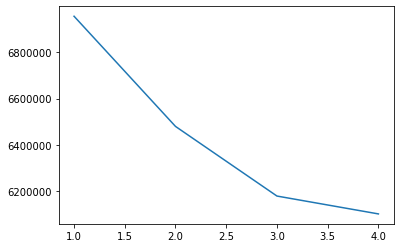

In [182]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)



y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

